In [3]:
# 필수 라이브러리 불러오기
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# macOS 한글 폰트 설정
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# Iris 데이터: 클래스 0 vs 1 (Setosa vs Versicolor), 특성 2개
iris = load_iris()
X = iris.data[:100, [0, 2]]  # 꽃받침 길이, 꽃잎 길이
y = iris.target[:100]        # 0: Setosa, 1: Versicolor

# 정규화
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.25, random_state=1, stratify=y)

# 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 정확도 출력
print(f"LogisticRegression 테스트 정확도: {model.score(X_test, y_test):.2f}")

LogisticRegression 테스트 정확도: 1.00


In [5]:
def plot_logistic_decision(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 격자 좌표 생성
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    # 색상 설정
    cmap_light = ListedColormap(['#FFDDDD', '#DDDDFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100)

    plt.xlabel('꽃받침 길이 (표준화)')
    plt.ylabel('꽃잎 길이 (표준화)')
    plt.title(title)
    plt.grid(True)

    # 범례 추가
    plt.legend(handles=scatter.legend_elements()[0],
               labels=['Setosa (0)', 'Versicolor (1)'],
               loc='upper right')
    plt.show()

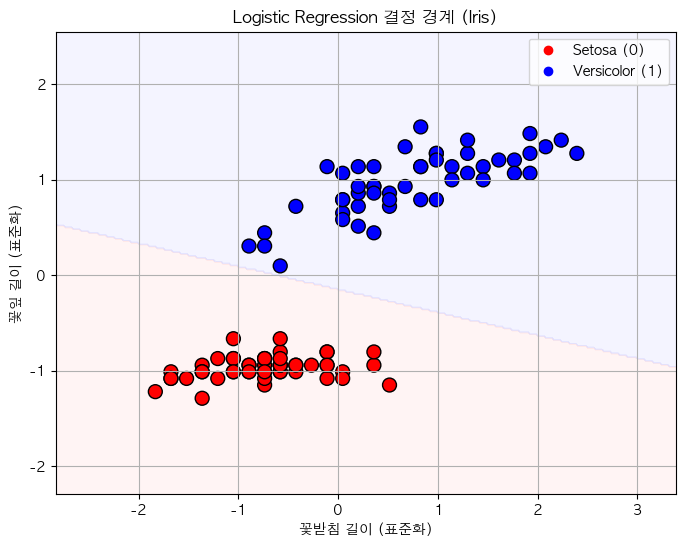

In [7]:
plot_logistic_decision(X_std, y, model, "Logistic Regression 결정 경계 (Iris)")